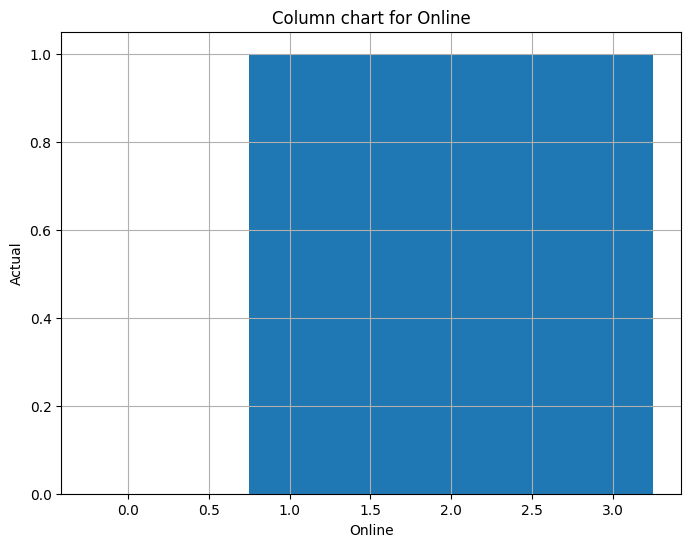

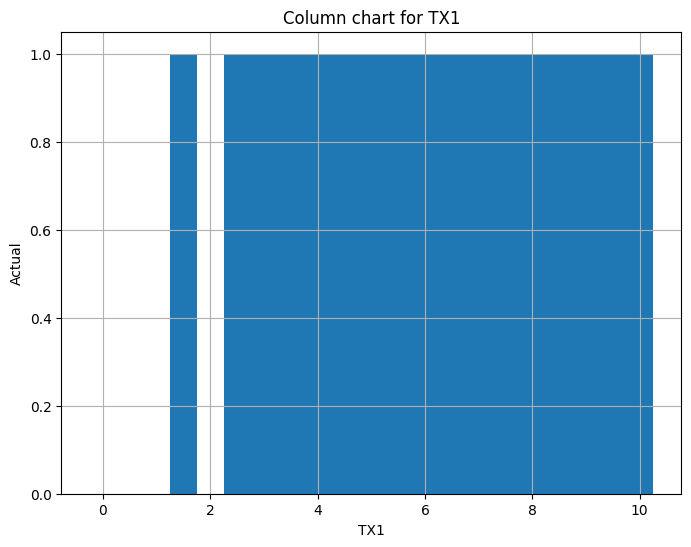

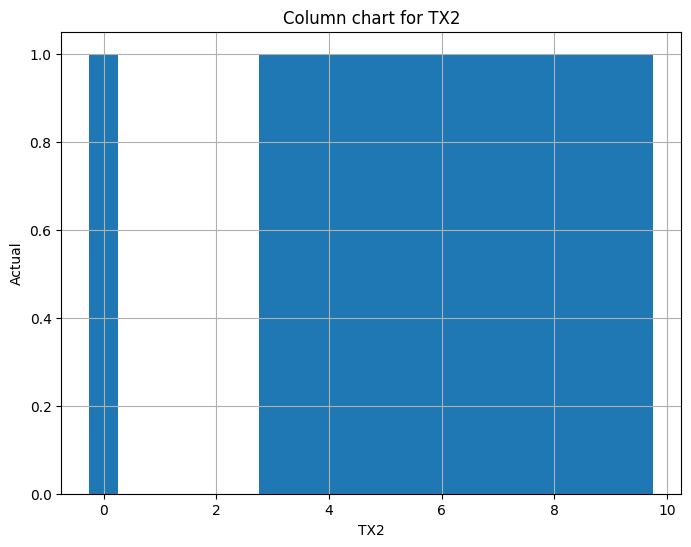

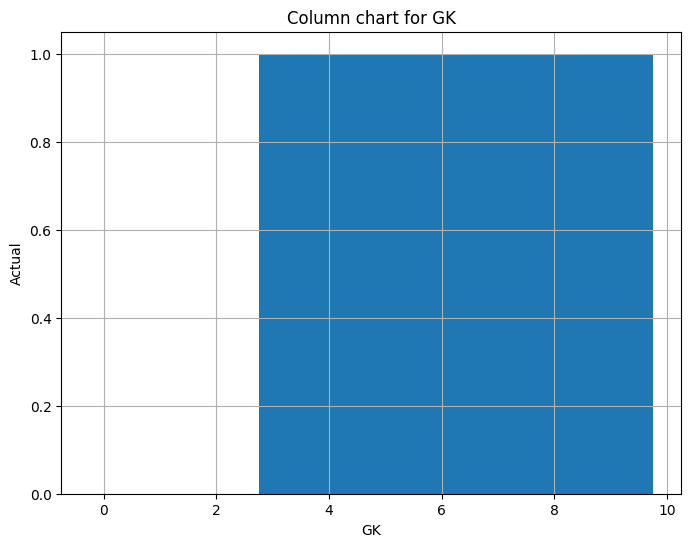

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.31366188369676845
Cost after iteration 200: 0.17969974763126895
Cost after iteration 300: 0.15260380757297132
Cost after iteration 400: 0.13448783292437932
Cost after iteration 500: 0.12125698843425194
Cost after iteration 600: 0.11105664261450816
Cost after iteration 700: 0.1028949233340723
Cost after iteration 800: 0.09618298448065618
Cost after iteration 900: 0.09054500603416508
Cost after iteration 1000: 0.08572801789176053
Cost:  0.08572801789176053
Weight:  [ 4.69899025  0.18002779 -0.23572953  0.26397947]
Bias:  -5.1256332181873825


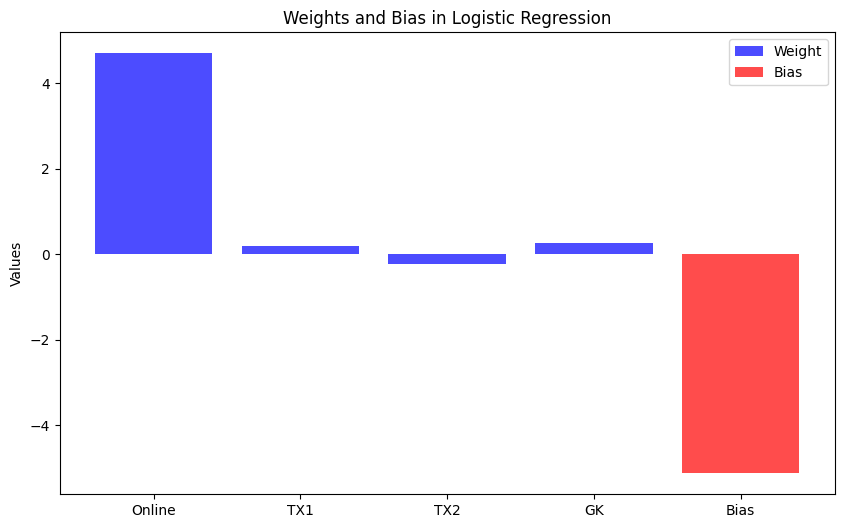

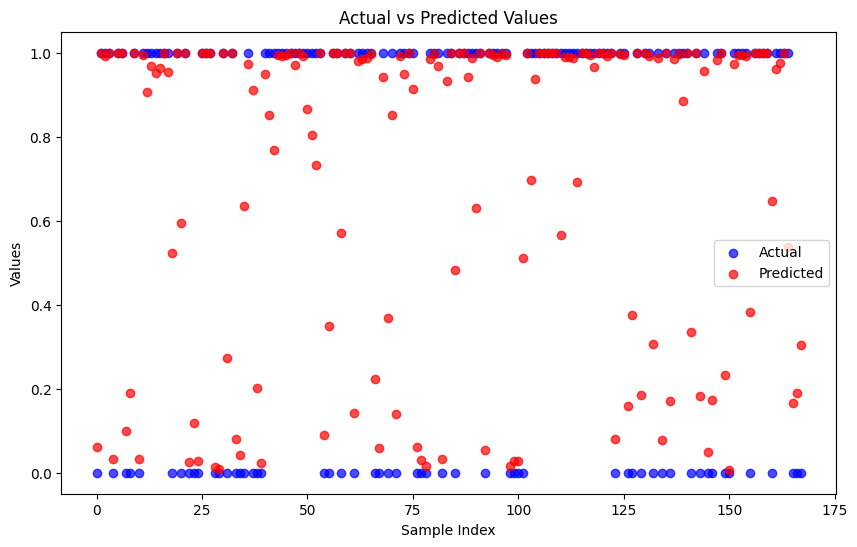

Accuracy: 0.00
Predicted: 0.062361306044415754 Actual: 0
Predicted: 0.9996612944739237 Actual: 1
Predicted: 0.9910258964888052 Actual: 1
Predicted: 0.9997259029973243 Actual: 1
Predicted: 0.03348024667061237 Actual: 0
Predicted: 0.9998889584789602 Actual: 1
Predicted: 0.9997842990969696 Actual: 1
Predicted: 0.09861849217011434 Actual: 0
Predicted: 0.1898504999656895 Actual: 0
Predicted: 0.9995116610796311 Actual: 1
Predicted: 0.03247404690575001 Actual: 0
Predicted: 0.9936324684370077 Actual: 1
Predicted: 0.9058722838537008 Actual: 1
Predicted: 0.9672292548582164 Actual: 1
Predicted: 0.9515069765560303 Actual: 1
Predicted: 0.9646636194289343 Actual: 1
Predicted: 0.9999410685184411 Actual: 1
Predicted: 0.9549533220002125 Actual: 1
Predicted: 0.5235831654321388 Actual: 0
Predicted: 0.9999581815233529 Actual: 1
Predicted: 0.5940767214022479 Actual: 0
Predicted: 0.9999228478533666 Actual: 1
Predicted: 0.02593391806042107 Actual: 0
Predicted: 0.11845000371806608 Actual: 0
Predicted: 0.02684

In [4]:
import pandas as pd #thư viện đọc ghi file
import numpy as np #thư viện ma trận, tính toán, .....
import seaborn as sns #thư viện vẽ đồ thị
import matplotlib.pyplot as plt #thư viện vẽ đồ thị
from sklearn.model_selection import train_test_split #thư viện chia tệp

def sigmoid(z):
  #Hàm kích hoạt giá trị từ 0 dến 1
  return 1 / (1 + np.exp(-z))

def initialize_parameters(n_features):
  #Khởi tạo các tham số như weight, bias đều bằng 0
  W = np.zeros(n_features)
  b = 0
  return W, b

def forward_propagation(X, W, b):
  #lan truyền thằng và tìm đầu ra
  Z = np.dot(X, W) + b
  A = sigmoid(Z)
  return A

def compute_cost(A, Y):
  #tính giá trị lỗi cho hàm bằng cross-entropy loss
    m = len(Y)
    error = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return error

def backward_propagation(X, A, Y):
  #lan truyền ngược tính đạo hàm riêng
    m = len(Y)
    dZ = A - Y
    dW = (1 / m) * np.dot(X.T, dZ)
    db = (1 / m) * np.sum(dZ)
    return dW, db

def update_parameters(W, b, dW, db, learning_rate):
  #update lại weight và bias dùng gradient descent
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

def logistic_regression(X, Y, num_iterations, learning_rate):
    n_features = X.shape[1] #số lượng đầu vào tx1, tx2, gk, tgonl
    W, b = initialize_parameters(n_features) #khởi tạo các tham số weight, bias bằng 0

    for i in range(num_iterations + 1): #epochs từ i đến n - 1
        A = forward_propagation(X, W, b) #tính đầu vào net và đầu ra cho lan truyền thẳng
        cost = compute_cost(A, Y) # tính lỗi của mô hình
        dW, db = backward_propagation(X, A, Y) #đạo hàm riêng của các tham số
        W, b = update_parameters(W, b, dW, db, learning_rate) #cập nhật lại tham số

        if i % 100 == 0: #in ra lỗi cứ sau 100 lần
            print(f"Cost after iteration {i}: {cost}")

    # In ra sai số, weight và bias cuối cùng
    print("Cost: ", cost)
    print("Weight: ", W)
    print("Bias: ", b)

    return W, b #trả về ma trận weight và bias

def predict(X, W, b):
    A = forward_propagation(X, W, b) #tính đầu vào net và đầu ra
    #predictions = np.round(A) #làm tròn chạy từ 0 đến 1 sẽ làm tròn <0.5 thì mình quy la 0 còn >= 0.5 mình quy nó 1
    predictions = A # giá trị dự đoán
    return predictions

# Đọc dữ liệu từ tệp CSV bằng pandas
data = pd.read_csv('data_TA1.csv', encoding='utf-8') #mã hóa utf-8

# Chọn các cột đầu vào và cột đầu ra
input_cols = ['Online', 'TX1', 'TX2', 'GK']
output_col = 'Actual'
X = data.loc[:, input_cols]
y = data.loc[:, output_col]

# Vẽ đồ thị cột thể hiện sự tương quan của đầu vào với đầu ra
selected_data = data[input_cols + [output_col]]
for col in input_cols:
    plt.figure(figsize=(8, 6))
    plt.bar(selected_data[col], selected_data[output_col], width=0.5, align='center')
    plt.xlabel(col)
    plt.ylabel('Actual')
    plt.title(f'Column chart for {col}')
    plt.grid(True)
    plt.show()

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lưu file test ra ngoài
test_data = pd.DataFrame({'Online': X_test['Online'], 'TX1': X_test['TX1'], 'TX2': X_test['TX2'], 'GK': X_test['GK'], 'Actual': y_test})
test_data.to_csv('test_data.csv', index=False, encoding='utf-8')

# Huấn luyện mô hình Logistic Regression trên tập huấn luyện
num_iterations = 1000 #epochs
learning_rate = 0.2
W, b = logistic_regression(X_train, y_train, num_iterations, learning_rate)

# Plot trọng số và bias
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(input_cols, W, color='blue', alpha=0.7, label='Weight')
ax.bar('Bias', b, color='red', alpha=0.7, label='Bias')
ax.set_ylabel('Values')
ax.set_title('Weights and Bias in Logistic Regression')
ax.legend()
plt.show()

# Dự đoán trên tập kiểm tra
y_pred = predict(X_test, W, b)

# Tạo biểu đồ scatter plot giữa giá trị dự đoán và giá trị thực tế
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.7)
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.7)
ax.set_xlabel('Sample Index')
ax.set_ylabel('Values')
ax.set_title('Actual vs Predicted Values')
ax.legend()
plt.show()

# Đánh giá mô hình trên tập kiểm tra theo độ chính xác phần trăm
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

# In giá trị dự đoán và giá trị thực để so sánh
for pred, actual in zip(y_pred, y_test):
    print("Predicted:", pred, "Actual:", actual)